In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matlib
import seaborn as sns

In [54]:
df = pd.read_csv("HR_comma_sep.csv")

In [4]:
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [55]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [56]:
df.columns = ["satisfaction", "evaluation", "projectCount", "MonthlyHours", "yearsCompany", "workAccident", "turnOver", "promotion", "department","salary" ]

In [57]:
df.head()

,satisfaction,evaluation,projectCount,MonthlyHours,yearsCompany,workAccident,turnOver,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [58]:
columns_name = ["turnOver","satisfaction", "evaluation", "projectCount", "MonthlyHours", "yearsCompany", "workAccident", "promotion", "department","salary" ]

In [59]:
df = df.reindex(columns = columns_name)

In [60]:
df.head()

,turnOver,satisfaction,evaluation,projectCount,MonthlyHours,yearsCompany,workAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


In [61]:
df.shape

(14999, 10)

In [62]:
df.dtypes

turnOver          int64
satisfaction    float64
evaluation      float64
projectCount      int64
MonthlyHours      int64
yearsCompany      int64
workAccident      int64
promotion         int64
department       object
salary           object
dtype: object

In [63]:
turnOverRate = df.turnOver.value_counts()/len(df)

In [64]:
print(turnOverRate)

0    0.761917
1    0.238083
Name: turnOver, dtype: float64


In [65]:
df.describe()

,turnOver,satisfaction,evaluation,projectCount,MonthlyHours,yearsCompany,workAccident,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [21]:
summary = df.groupby('turnOver').mean()

# Check if there is any significant difference for the mean value of each feature for employees stay vs leave the company.
# from the mean value, it seems that employees who left the company seems less satisfied with the company, get less promotion and works longer in the company. 

In [66]:
summary

,satisfaction,evaluation,projectCount,MonthlyHours,yearsCompany,workAccident,promotion
turnOver,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Now we look at the correlation matrix and try to understand why employees leave the company

In [29]:
corr = df.corr()
corr
# check positive and negative correlations:
# positive correlation:
#  - evaluation vs. projectCount
#  - evaluation vs. Monthly Hours
#  - project Counts vs. Monthly hours 
# comments: This makes sense since people who work on more projects will spend more hours in the company, 
# and since they work more, it is reasonable that these employees get better evaluation. 

# negative correlation:
#  - turnOver vs. satisfication 
#  It looks that the satisfaction level is the driven factor that employees leave the company. 


,turnOver,satisfaction,evaluation,projectCount,MonthlyHours,yearsCompany,workAccident,promotion
turnOver,1.000000,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788
satisfaction,-0.388375,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605
evaluation,0.006567,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684
projectCount,0.023787,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064
MonthlyHours,0.071287,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544
yearsCompany,0.144822,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433
workAccident,-0.154622,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245
promotion,-0.061788,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000


<AxesSubplot:>

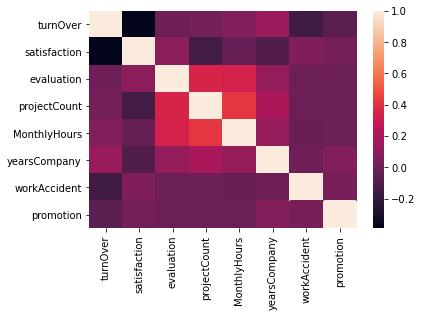

In [67]:
sns.heatmap(corr)

# Is the satisfaction level significantly different for employees? 
# T-test

In [69]:
emp_stay_population = df['satisfaction'][df['turnOver'] == 0].mean()
print('Employees staying in the company shows a satisfaction level of ' + str(emp_stay_population))
emp_leave_population = df['satisfaction'][df['turnOver'] == 1].mean()
print('Employees left the company shows a satisfaction level of ' + str(emp_leave_population))

Employees staying in the company shows a satisfaction level of 0.666809590479516
Employees left the company shows a satisfaction level of 0.44009801176140917


In [70]:
import scipy.stats as stats
stats.ttest_1samp(a = df[df['turnOver']==1]['satisfaction'], # population of employees left the company
                  popmean = emp_stay_population)  # mean of employees stay in the company

Ttest_1sampResult(statistic=-51.3303486754725, pvalue=0.0)

In [71]:
# p-value is small, showing that the mean is significatnly different 

In [72]:
degree_freedom = len(df[df['turnOver']==1])

In [73]:
LQ = stats.t.ppf(0.025,degree_freedom)
RQ = stats.t.ppf(0.975,degree_freedom) 

In [74]:
print ('The t-distribution Left: ' + str(LQ))
print ('The t-distribution Right: ' + str(RQ))

The t-distribution Left: -1.9606285215955626
The t-distribution Right: 1.9606285215955621


Text(0.5, 1.0, 'Employee satisfaction Distribution - Turnover V.S. No Turnover')

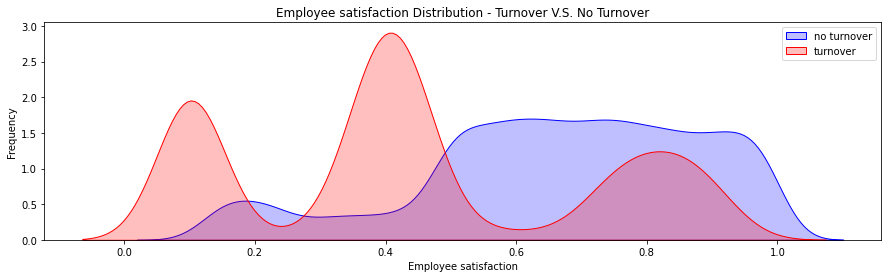

In [42]:
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(df['turnOver'] == 0),'satisfaction'] , color='b',shade=True,label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnOver'] == 1),'satisfaction'] , color='r',shade=True, label='turnover')
ax.set(xlabel='Employee satisfaction', ylabel='Frequency')
ax.legend()
plt.title('Employee satisfaction Distribution - Turnover V.S. No Turnover')

Text(0.5, 1.0, 'Employee evaluation Distribution - Turnover V.S. No Turnover')

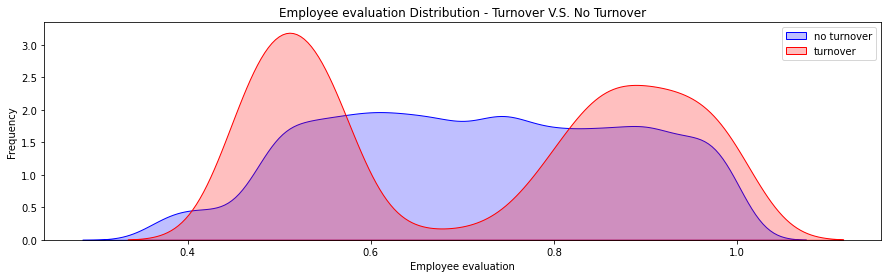

In [75]:
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(df['turnOver'] == 0),'evaluation'] , color='b',shade=True,label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnOver'] == 1),'evaluation'] , color='r',shade=True, label='turnover')
ax.set(xlabel='Employee evaluation', ylabel='Frequency')
ax.legend()
plt.title('Employee evaluation Distribution - Turnover V.S. No Turnover')

Text(0.5, 1.0, 'Employee MonthlyHours Distribution - Turnover V.S. No Turnover')

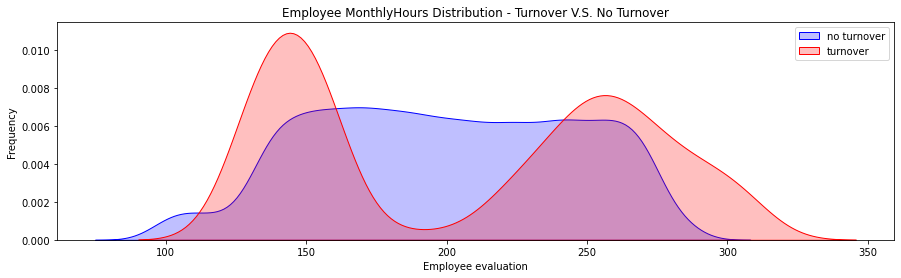

In [44]:
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(df['turnOver'] == 0),'MonthlyHours'] , color='b',shade=True,label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnOver'] == 1),'MonthlyHours'] , color='r',shade=True, label='turnover')
ax.set(xlabel='Employee evaluation', ylabel='Frequency')
ax.legend()
plt.title('Employee MonthlyHours Distribution - Turnover V.S. No Turnover')

# Predictive modeling 

In [78]:
df["department"] = df["department"].astype('category').cat.codes
df["salary"] = df["salary"].astype('category').cat.codes
df.head()

,turnOver,satisfaction,evaluation,projectCount,MonthlyHours,yearsCompany,workAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,7,1
1,1,0.80,0.86,5,262,6,0,0,7,2
2,1,0.11,0.88,7,272,4,0,0,7,2
3,1,0.72,0.87,5,223,5,0,0,7,1
4,1,0.37,0.52,2,159,3,0,0,7,1


In [82]:
# split the data into training and testing sets
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve

target_name = 'turnOver'
X = df.drop(target_name, axis=1)
y = df[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

# Decision tree vs Random Forest

In [83]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [84]:
dtree = tree.DecisionTreeClassifier(
    criterion='entropy',
    #max_depth=3,
    min_weight_fraction_leaf=0.01
    )

In [86]:
dtree = dtree.fit(X_train, y_train)
print ("\n\n --- decision tree---")
dt_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
print ("decision tree AUC = %2.2f" % dt_roc_auc)
print(classification_report(y_test, dtree.predict(X_test)))



 --- decision tree---
decision tree AUC = 0.93
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1714
           1       0.93      0.89      0.91       536

    accuracy                           0.96      2250
   macro avg       0.95      0.93      0.94      2250
weighted avg       0.96      0.96      0.96      2250



In [87]:
rf = RandomForestClassifier(
     criterion='entropy',
     n_estimators=1000, 
     max_depth=None,
     min_samples_split=10
    #min_weight_fraction_leaf=0.02
)

rf.fit(X_train, y_train)

print ("\n\n --- random forest tree---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("raondom forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))



 --- random forest tree---
raondom forest AUC = 0.97
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1714
           1       0.99      0.94      0.96       536

    accuracy                           0.98      2250
   macro avg       0.99      0.97      0.98      2250
weighted avg       0.98      0.98      0.98      2250



In [88]:
# ROC

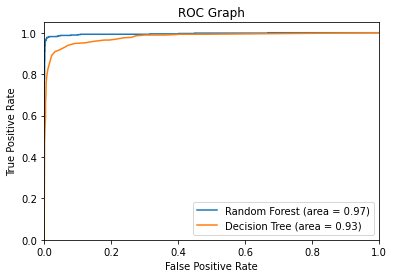

In [89]:
from sklearn.metrics import roc_curve
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])

plt.figure()

# 随机森林 ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)

# 决策树 ROC
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

In [90]:
# importance per feature

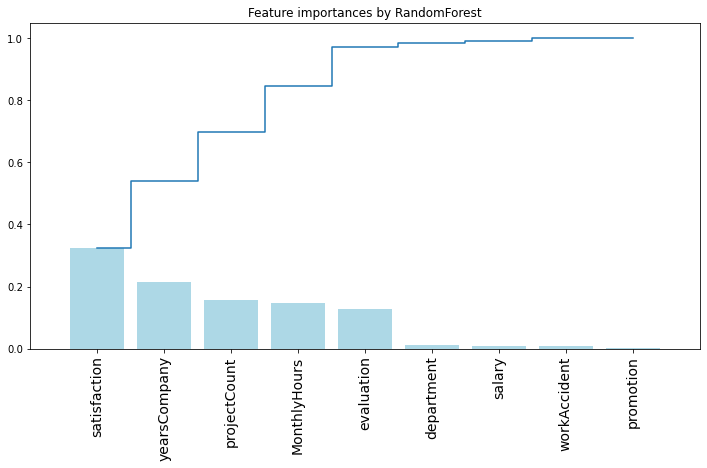

In [91]:
importances = rf.feature_importances_
feat_names = df.drop(['turnOver'],axis=1).columns

indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by RandomForest")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

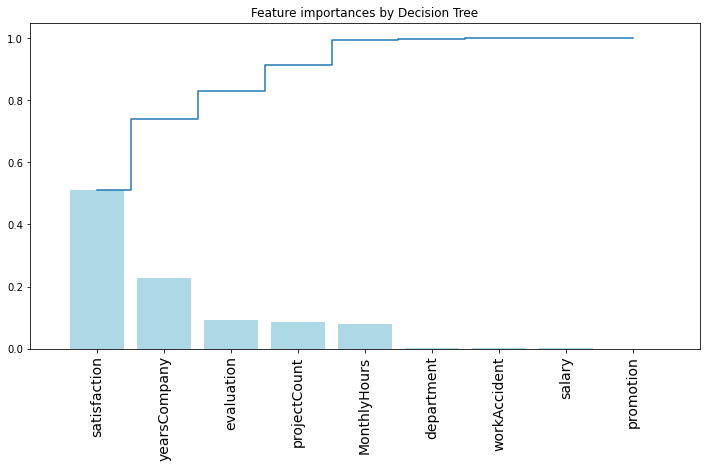

In [93]:
importances = dtree.feature_importances_
feat_names = df.drop(['turnOver'],axis=1).columns


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by Decision Tree")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()